<a href="https://colab.research.google.com/github/Genious-Bajracharya/Python-Projects/blob/main/classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Descriptio**n

This dataset determines whether water is potable or not using various features.
this dataset can be found on: https://www.kaggle.com/adityakadiwal/water-potability

The dataset below has been further modified to fit 3 classes instead of 2 making it multiclass.
```
# This is formatted as code
```



#Data Understanding
**Ph**- ph is basically acidic or basic measurement of the water.The range goes from 0 to 14, with 7 being neutral.

**Hardness**- hardness means high amount of mineral in the water.Hardness is mainly caused by calcium and magnesium salts.

**Chloramines**- Chloramine is a chemical compound made by reacting ammonia with the active ingredient in chlorine bleach. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.  

**Sulfate**-  Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.

**Conductivity**- Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity.According to WHO standards, EC value should not exceeded 400 μS/cm.

**Organic_carbon**- Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM).

**Trihalomethanes**-THMs are chemicals which may be found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.

**Turbidity**- The turbidity of water depends on the quantity of solid matter present in the suspended state. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**Solids**- Water has the ability to dissolve a wide range of inorganic and some organic minerals. hese minerals produced un-wanted taste and diluted color in appearance of water. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**Potability**- Indicates if water is safe for human consumption where 2 means semi-potable (Can drink but only during emergency as not fully safe) 1 means Potable(fuly safe for drinking) and 0 means Not potable(Completely not dafe for drinking).

In [ ]:
#impoerting libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In this dataset potability is our deopendent variable whiile rest are independent variable. All the columns with detail are mentioned above.

In [ ]:

df=data
df.shape

(3276, 10)

We have 10 columns and 3276 rows in our dataset

In [ ]:
data.info()
#All information regarding table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# #Except Target feature, other features are float and continueous value


In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')#dataset desc

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.496337,0.598970,0.000000,0.000000,0.000000,1.000000,2.000000


As we can see count is not equal therefore there are null values present here.

Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.

In [ ]:
#Checking null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692710,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601920,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268370,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841820,7.334648,NaN,442.545774,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862850,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539070,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481630,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979050,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


we will now drop the columns will null value


In [ ]:
df.drop(['Sulfate','ph','Trihalomethanes'],axis=1,inplace=True)

In [ ]:
#Checking null values again
df.isnull().sum()

Hardness          0
Solids            0
Chloramines       0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
dtype: int64

As we can see there are no more null values remanining

In [ ]:
#0 being not potable and 1 being potable
df['Potability'].value_counts()

0    1828
1    1270
2     178
Name: Potability, dtype: int64

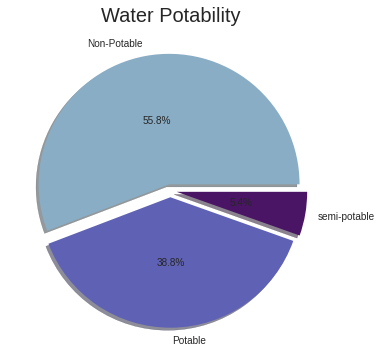

In [ ]:
colors = sns.color_palette('twilight')[0:6]
labels = ['Non-Potable', 'Potable','semi-potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1],
         df['Potability'].value_counts()[2]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*3, autopct='%1.1f%%',pctdistance=0.5, shadow=True,colors=colors)
plt.title("Water Potability", fontsize=20);
plt.show()

In the above figure we can see the 3 different states of potability being represented inna pie chart.
This figure shows 55.8% data from the set are not potable while , 38.8% is potable and finally only 5.4% of water is half-potable.

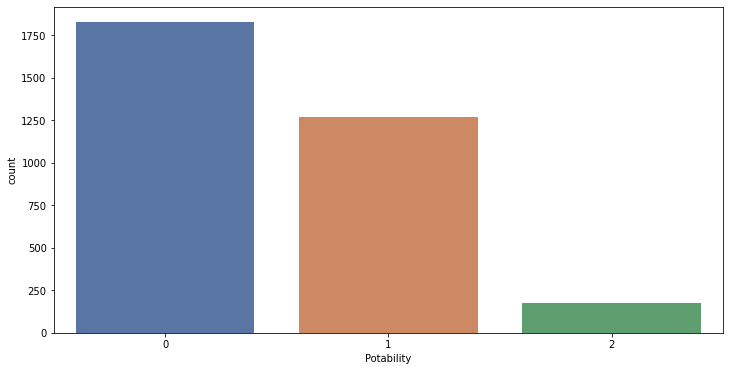

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=df, palette='deep');

In the above figure we can see the 3 different states of potability in more detail. As we can see the three states of potability being represented by 0-not potable, 1-potable, and 2-half-potable being represented in the X axis. And in the Y axis we can see the count of the 3 states oif potability from the dataset.


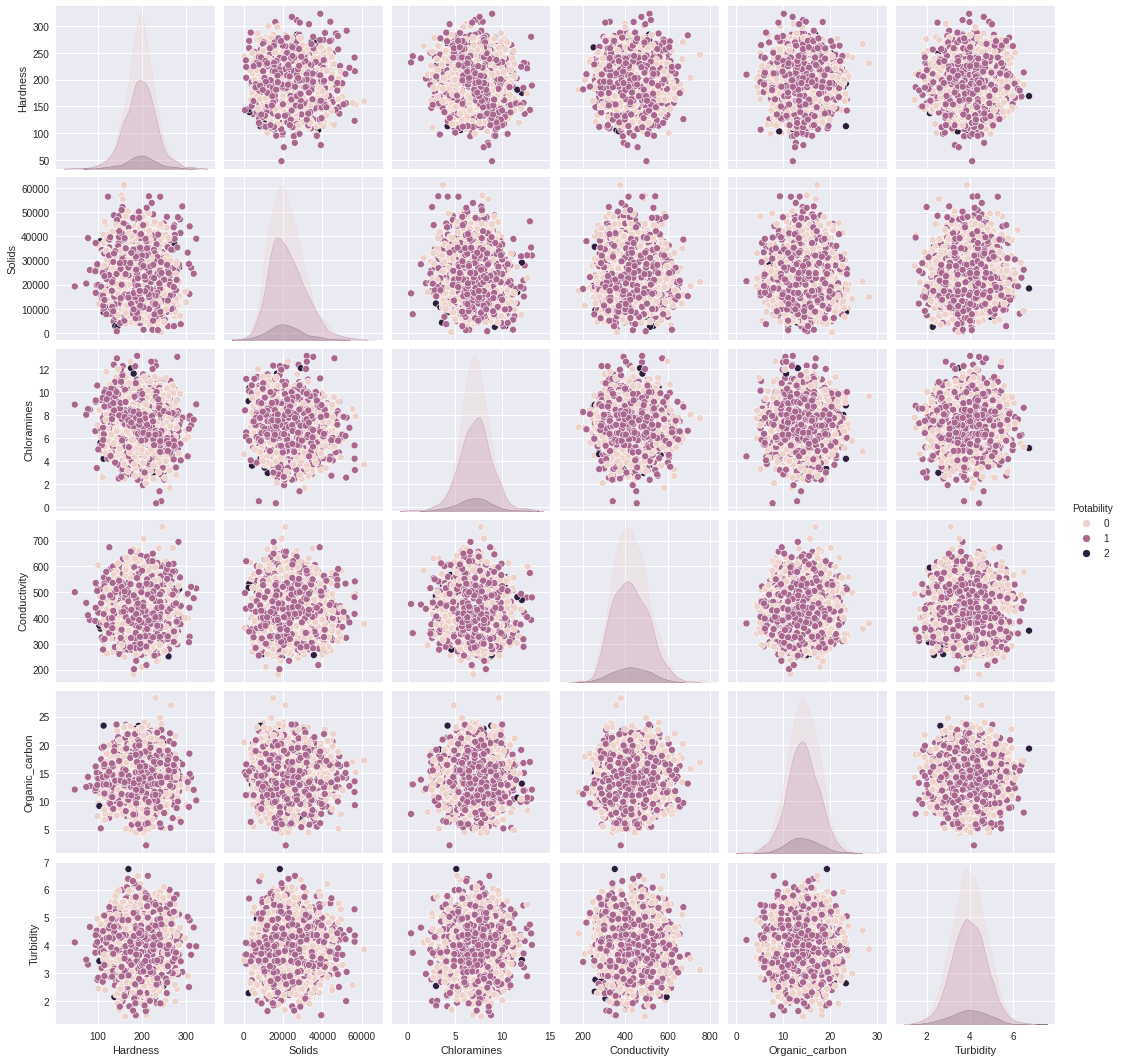

In [ ]:
ax = sns.pairplot(df, hue="Potability")
plt.show()

In this above figure we can see potability being compared with rest of the columns and columns being compared with each other from the dataset with the help of pair plot.
For eg: In the position [0,1] we can see how hardness and Turbidity affect the potability of water.
Pairplot for all independent variables with dependent varibale
Here we can see how each independent feature affects our dependent variable in combination with other indepenent columns.


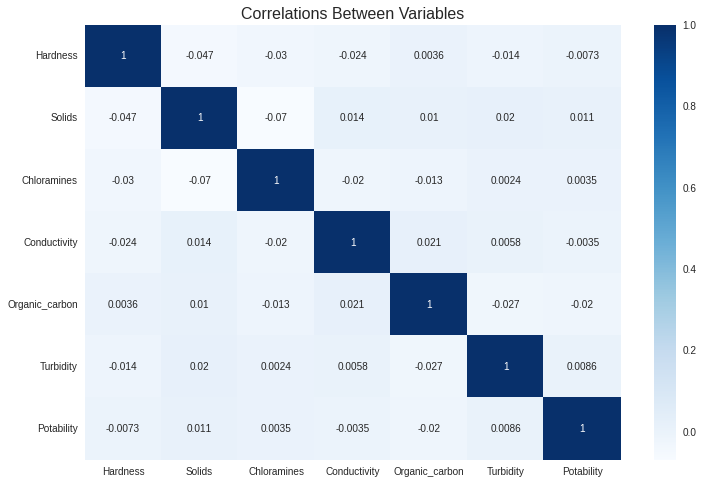

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

THe figure above shows us the correlation between all the variables present in the dataset. As we can see hte correlation between the variables are pretty low.

In [ ]:
#separating data
X= df.iloc[: , :6]
y = df.iloc[: , 6]
print(X.head())
print(y.head())

     Hardness       Solids  ...  Organic_carbon  Turbidity
0  204.890456  20791.31898  ...       10.379783   2.963135
1  129.422921  18630.05786  ...       15.180013   4.500656
2  224.236259  19909.54173  ...       16.868637   3.055934
3  214.373394  22018.41744  ...       18.436525   4.628771
4  181.101509  17978.98634  ...       11.558279   4.075075

[5 rows x 6 columns]
0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


# Logistic Regression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.56
Accuracy of Logistic regression classifier on test set: 0.56


# AUC-ROC CURVE

AUC-ROC curve or the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC).
ROC Curve is a useful tool while predicting the probability of a binary outcome

**Sensitivity /True** **Positive**

IT tells us what proportion of the positive class got correctly classified.


**False** **Negative** **Rate**

False Negative Rate (FNR) tells us what proportion of the positive class got incorrectly classified by the classifier.

A higher TPR and a lower FNR is desirable since we want to correctly classify the positive class.



**Specificity**  **True Negative** **Rate**


Specificity tells us what proportion of the negative class got correctly classified.

Taking the same example as in Sensitivity, Specificity would mean determining the proportion of healthy people who were correctly identified by the model.


**False Positive Rate**

FPR tells us what proportion of the negative class got incorrectly classified by the classifier.

A higher TNR and a lower FPR is desirable since we want to correctly classify the negative class.



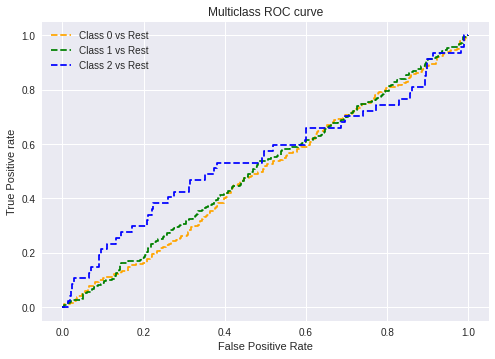

In [ ]:
#ROC curve for multiclass
from sklearn.multiclass import OneVsRestClassifier
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
tclass = 3

for i in range(tclass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
from sklearn.metrics import roc_curve
model1 = logreg
model1.fit(X_train, y_train)
pred_prob1 = model1.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

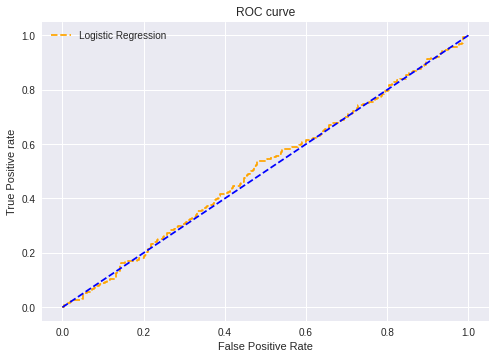

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();